In [14]:
#TODO:　SVMと決定木の演習問題
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.inspection import permutation_importance
import japanize_matplotlib
bc = load_breast_cancer(as_frame=True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    bc.data, 
    bc.target, 
    test_size=0.3,
    random_state=0)


In [16]:
#SVMモデル
model_svc = SVC(kernel='linear',probability=True,random_state=0)
model_svc.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:
#決定木モデル
model_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3, 
    min_samples_split=15)
model_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,15
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [18]:
#ランダムフォレストモデル
model_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    max_features=15)
model_forest.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,15
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


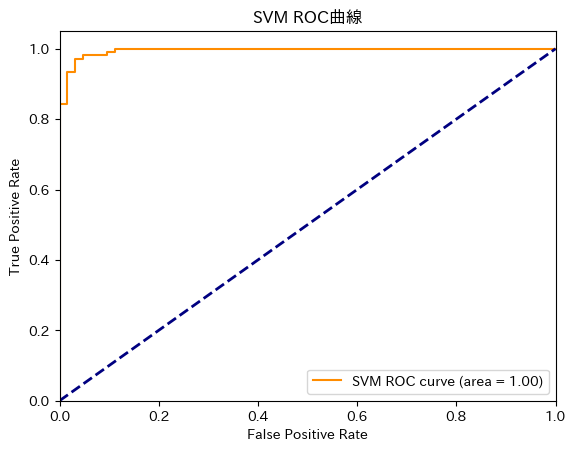

In [19]:
#SVM精度評価
y_proba = model_svc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='SVM ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC曲線')
plt.legend(loc="lower right")
plt.show()

In [20]:
model_svc.score(X_test, y_test)

0.9590643274853801

In [21]:
#決定木モデルの精度評価
model_tree.score(X_test, y_test)


0.9532163742690059

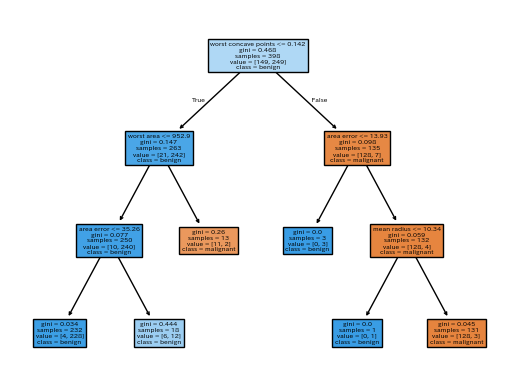

In [22]:
plot_tree(
    model_tree,
    feature_names=bc.feature_names,
    class_names=bc.target_names,
    filled=True)
plt.show()

In [23]:
#ランダムフォレストの精度評価
model_forest.score(X_test, y_test)

0.9532163742690059

In [24]:
forest_importances = pd.DataFrame(
    model_forest.feature_importances_,
    index=bc.feature_names,
    columns=['重要度']
).sort_values(by='重要度', ascending=False)
forest_importances

,重要度
mean concave points,0.278624
worst concave points,0.215815
worst perimeter,0.203425
worst radius,0.082277
worst area,0.053595
mean concavity,0.036611
area error,0.026887
worst concavity,0.017720
worst texture,0.016534
worst symmetry,0.009709


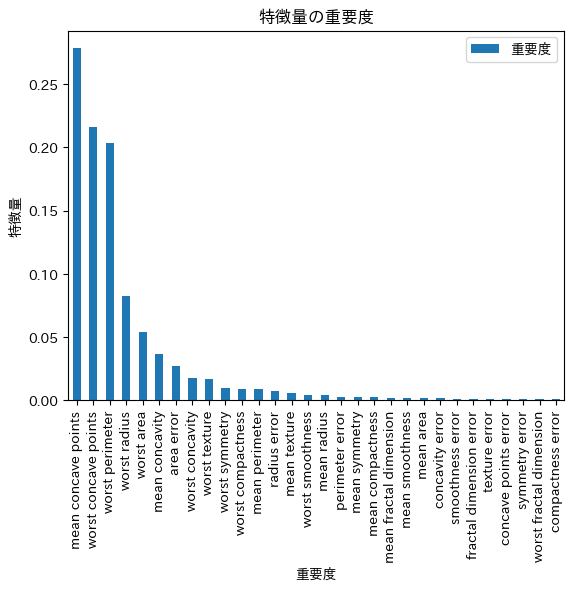

In [ ]:
forest_importances.plot.bar()
plt.title('特徴量の重要度')
plt.xlabel('重要度')
plt.ylabel('特徴量')
plt.show()

In [26]:
importance = permutation_importance(
    model_forest, X_test, y_test, n_repeats=10, random_state=0
    )

In [29]:
forest_pfi= pd.Series(importance.importances_mean, index=bc.feature_names
    ).sort_values(ascending=False)

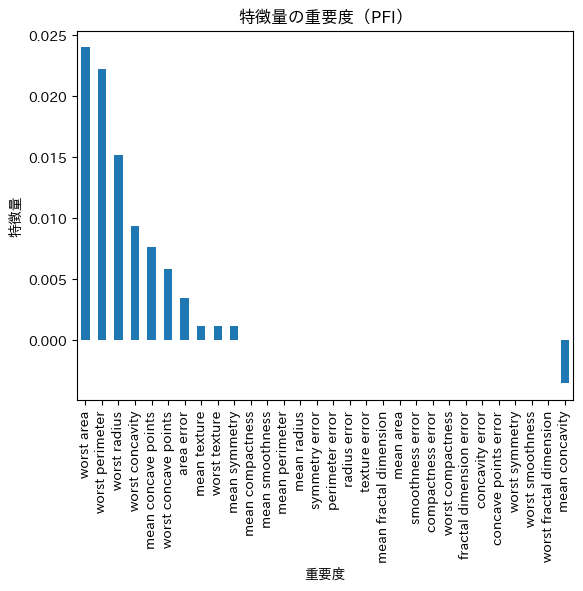

In [32]:
forest_pfi.plot.bar()
plt.title('特徴量の重要度（PFI）')
plt.xlabel('重要度')
plt.ylabel('特徴量')
plt.show()